<a href="https://colab.research.google.com/github/Nram94/simulacion-modelacion-python/blob/main/Semana02_SimulacionEstaticaDinamica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación Estática

---

# Producción de una Base de Crema 🧴
Considere un proceso en lotes de producciòn de una crema, como se representa en la siguiente Figura:
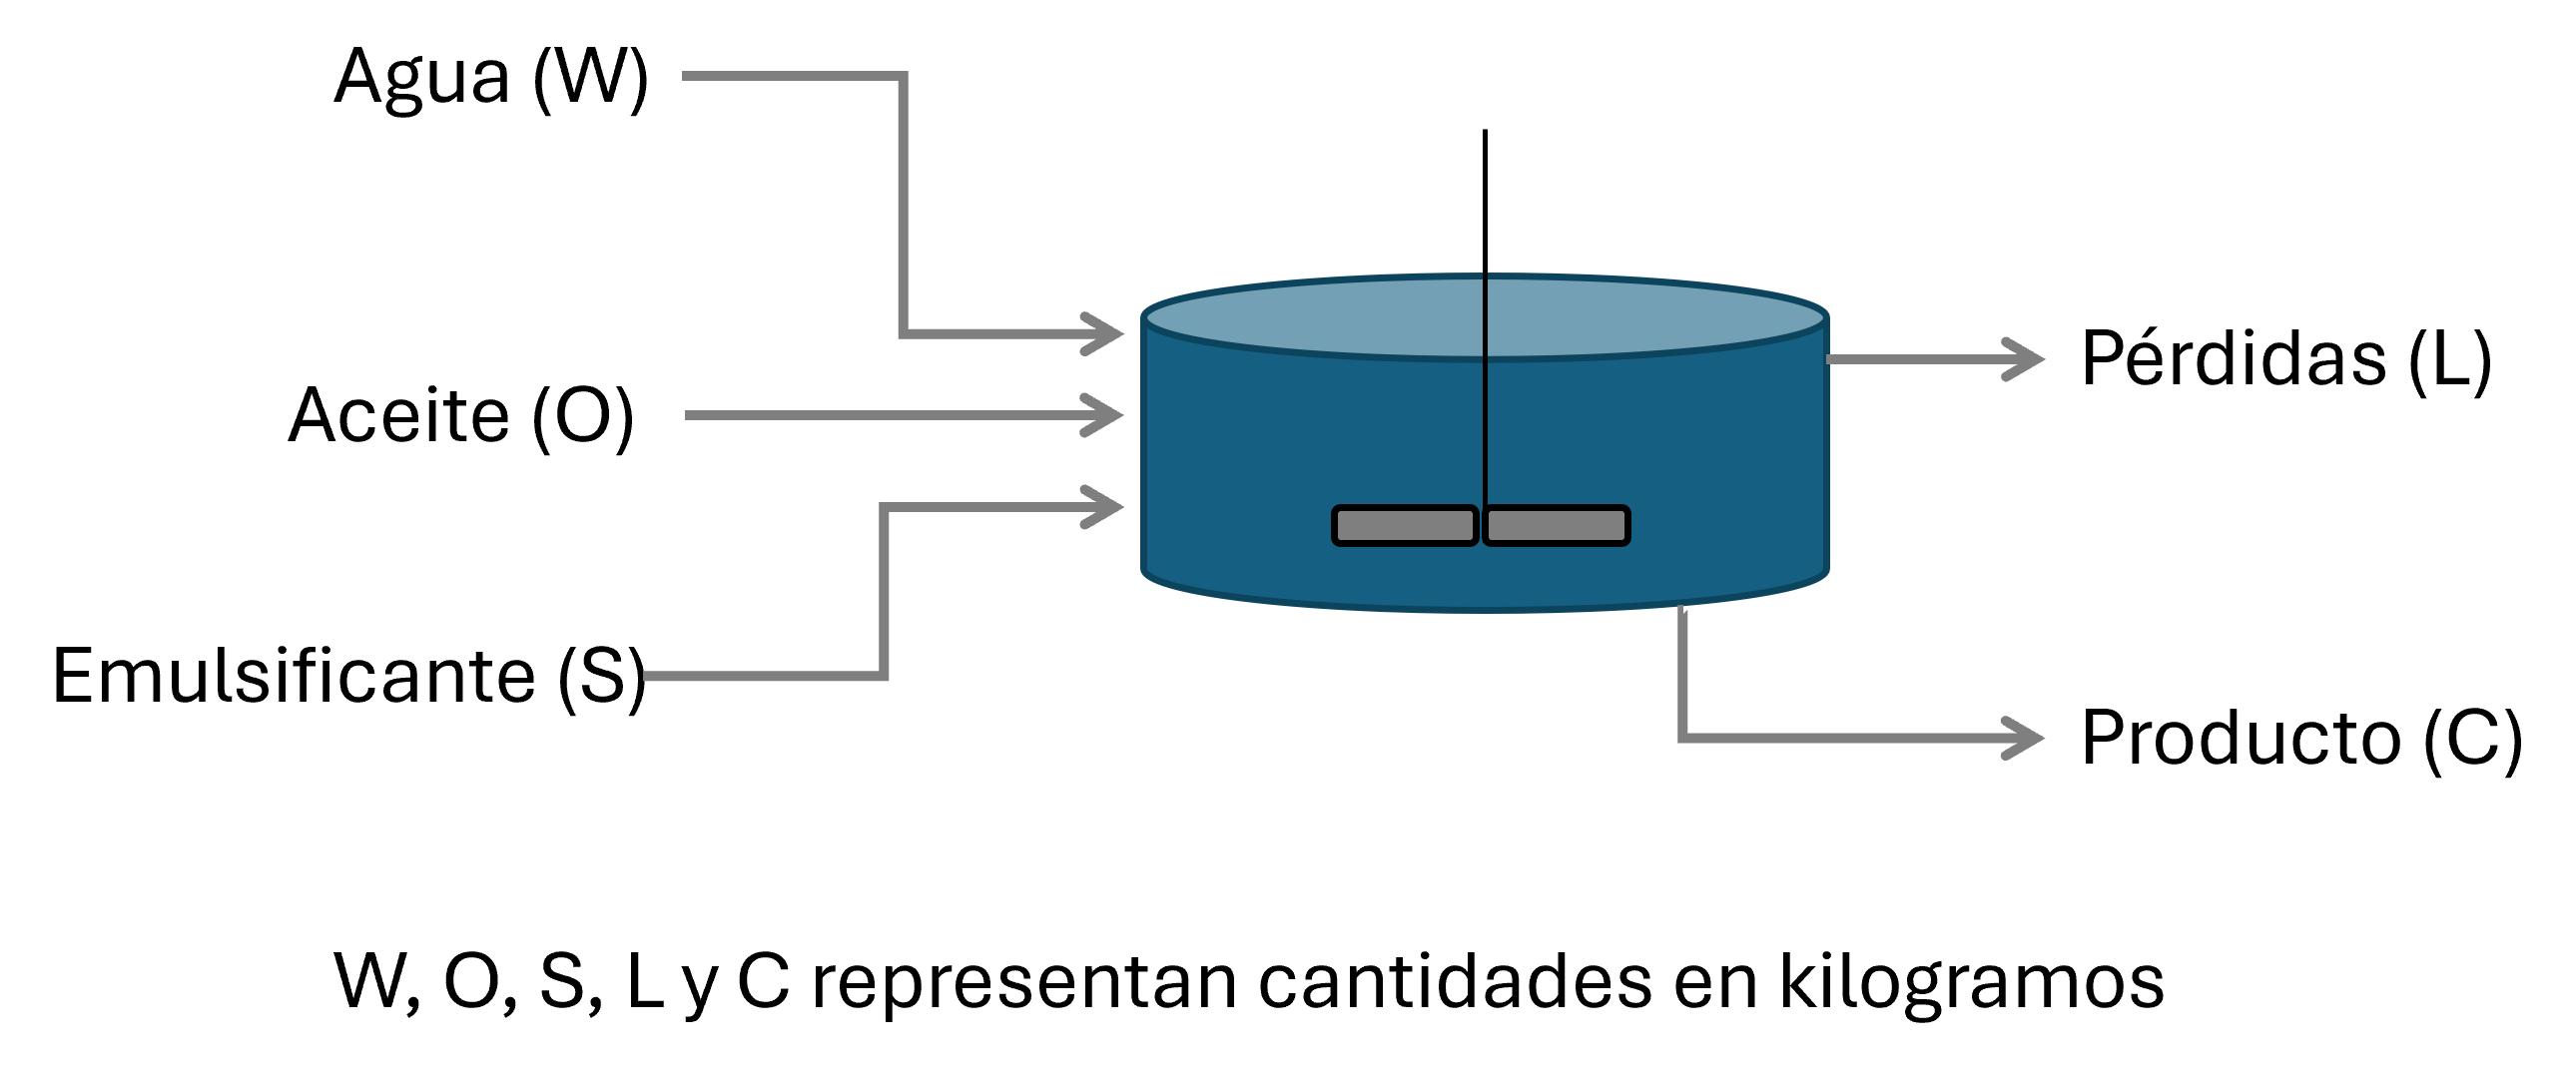

Si se desean obtener 100 kg de producto, hallar la cantidad de ingredientes (W, O y S) que se deben emplear en el proceso, sabiendo que las pérdidas usualmente son del 2%, el contenido de emulsificante debe ser 5% del contenido de agua, y la relación aceite/agua debe ser del 60%.

---


## Solución "Desde Cero" (Sustitución Secuencial - Teórico)
**Propósito**: Mostrar la lógica iterativa del método. No lo vamos a ejecutar a la perfección, sino a ilustrar su naturaleza iterativa.

**Método**: Usar un bucle for (que ya conocen) para simular las iteraciones.

In [13]:
# Solución desde CERO: Sustitución Secuencial
# Ilustración de cómo se resolvería sin librerías avanzadas

W, L, S, O = 0.0,0.0, 0.0, 0.0  # Asumimos valores iniciales (suposición)
C = 100 # kg/h
# Simulamos 5 iteraciones para ver la convergencia
print("Iteración |    W    |    L    |    S    |    O    | |    error   | ")
print("---------------------------------------")

for i in range(1, 50):
    # Despejamos cada variable para ilustrar la secuencia (ejemplo simplificado)
    W_nuevo = L + C - S - O
    L_nuevo = 0.02*C / 0.98
    S_nuevo = 0.05*W
    O_nuevo = 0.6*W
    error = (W_nuevo - W) + (L_nuevo - L) + (S_nuevo - S) + (O_nuevo - O)
    # Actualizamos los valores
    W, L, S, O = W_nuevo, L_nuevo, S_nuevo, O_nuevo
    print(f"   {i}      | {W:.2f} | {L:.2f} | {S:.2f} | {O:.2f} || {error:.5f} |")

print("\nConclusión: Este método es laborioso y requiere muchas iteraciones.")

Iteración |    W    |    L    |    S    |    O    | |    error   | 
---------------------------------------
   1      | 100.00 | 2.04 | 0.00 | 0.00 || 102.04082 |
   2      | 102.04 | 2.04 | 5.00 | 60.00 || 67.04082 |
   3      | 37.04 | 2.04 | 5.10 | 61.22 || -63.67347 |
   4      | 35.71 | 2.04 | 1.85 | 22.22 || -43.57653 |
   5      | 77.96 | 2.04 | 1.79 | 21.43 || 41.38776 |
   6      | 78.83 | 2.04 | 3.90 | 46.78 || 28.32474 |
   7      | 51.36 | 2.04 | 3.94 | 47.30 || -26.90204 |
   8      | 50.80 | 2.04 | 2.57 | 30.82 || -18.41108 |
   9      | 68.65 | 2.04 | 2.54 | 30.48 || 17.48633 |
   10      | 69.02 | 2.04 | 3.43 | 41.19 || 11.96720 |
   11      | 57.42 | 2.04 | 3.45 | 41.41 || -11.36611 |
   12      | 57.18 | 2.04 | 2.87 | 34.45 || -7.77868 |
   13      | 64.72 | 2.04 | 2.86 | 34.31 || 7.38797 |
   14      | 64.87 | 2.04 | 3.24 | 38.83 || 5.05614 |
   15      | 59.97 | 2.04 | 3.24 | 38.92 || -4.80218 |
   16      | 59.87 | 2.04 | 3.00 | 35.98 || -3.28649 |
   17      | 63.

## Solución con el Poder de NumPy (Solución Matricial)
**Propósito**: Mostrar la forma eficiente y estándar de resolver sistemas lineales en ingeniería.

**Función clave**: np.linalg.solve()

In [14]:
import numpy as np

# 0. Aplicar las relaciones entre L y C
C = 100 # kg/h
L = 0.02 * C /0.98
# 1. Definir la matriz de coeficientes A (el lado izquierdo de las ecuaciones)
# Las variables son W
A = np.array([
    [1.0, 1.0, 1.0], # W + S + O
    [-0.05, 1.0, 0.0], # -0.05W + S
    [-0.6, 0.0, 1.0]  # -0.6W + O
])

# 2. Definir el vector de resultados b (el lado derecho)
b = np.array([L + C, 0.0, 0.0])

# 3. ¡SOLUCIÓN INSTANTÁNEA con NumPy!
# Usamos np.linalg.solve(A, b)
solucion = np.linalg.solve(A, b)

# El vector 'solucion' contiene [W, S, O]
W_sol, S_sol, O_sol = solucion

print("--- Solución Matemática Directa (NumPy) ---")
print(f"Flujo de la Corriente W (kg/h): {W_sol:.2f}")
print(f"Flujo de la Corriente S (kg/h): {S_sol:.2f}")
print(f"Flujo de la Corriente O (kg/h): {O_sol:.2f}")
print(f"Flujo de la Corriente L (kg/h): {L:.2f}")

--- Solución Matemática Directa (NumPy) ---
Flujo de la Corriente W (kg/h): 61.84
Flujo de la Corriente S (kg/h): 3.09
Flujo de la Corriente O (kg/h): 37.11
Flujo de la Corriente L (kg/h): 2.04
